In [4]:
!pip install kagglehub 

In [5]:
import kagglehub
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

100%|██████████████████████████████████████| 8.70k/8.70k [00:00<00:00, 8.75MB/s]

Extracting files...
Path to dataset files: /Users/pranshughori/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [27]:
path = "/Users/pranshughori/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1/StudentsPerformance.csv"
df = pd.read_csv(path)
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. General Distribution Questions

How many students are in the dataset? 1000 Students

What percentage of students are male vs female? 48.20% Male / 100 - 48.20 = 51.80% Female

What’s the distribution of race/ethnicity groups (A–E)?

How many students had free/reduced lunch vs standard lunch?

How many completed the test prep course? 358

In [41]:
((df['gender'] == 'male').sum()/df['gender'].count())*100

np.float64(48.199999999999996)

In [48]:
group_count = df.groupby('race/ethnicity')['gender'].count().reset_index()
group_count.rename(columns={'gender': 'count'}, inplace=True)
print(group_count)

  race/ethnicity  count
0        group A     89
1        group B    190
2        group C    319
3        group D    262
4        group E    140


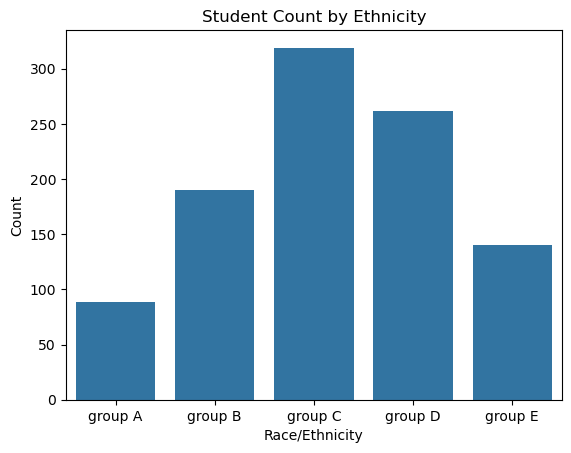

In [58]:
sns.barplot(x = 'race/ethnicity', y = 'count', data = group_count)
plt.title('Student Count by Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.show()

In [59]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [67]:
lunch_type = df.groupby(df['lunch'])['gender'].count().reset_index()
lunch_type.rename(columns = {'gender':'Count'}, inplace=True)
lunch_type

,lunch,Count
0,free/reduced,355
1,standard,645


In [71]:
(df['test preparation course'] == 'completed').sum()

np.int64(358)

2. Central Tendency & Spread (Numerical)

Summarize the key statistics for the three score columns.

What are the mean, median, mode, min, max, and standard deviation for:

Math score

Reading score

Writing score

Which subject has the highest average score overall?

Which subject shows the most variation (highest standard deviation)?

1️⃣ Overall Performance

The average scores (mean) for all three subjects are close:
Math ≈ 66.1
Reading ≈ 69.2
Writing ≈ 68.1

This indicates that students perform fairly consistently across all subjects.


2️⃣ Highest Average Score

Reading has the highest mean (69.169).
This suggests students generally perform best in reading comprehension compared to math or writing.


3️⃣ Central Tendency

The median values (Math 66, Reading 70, Writing 69) are close to their respective means, showing no strong skewness in the score distributions.
Mode values (Math 65, Reading 72, Writing 74) are also near the mean, supporting a symmetrical distribution.


4️⃣ Range of Scores

The minimum and maximum values show the full possible range (0–100), meaning the dataset includes very low and perfect scores, capturing the complete performance spectrum.


5️⃣ Variation in Performance


Writing shows the highest standard deviation (15.20) → students’ writing scores are more spread out (less consistent).
Reading has the lowest standard deviation (14.60) → performance in reading is more consistent across students.
Math falls in between (15.16).


6️⃣ Summary Insight

Best subject overall: Reading (highest mean).

Most variable subject: Writing (highest standard deviation).

Students are relatively balanced across all subjects but show slightly stronger and more consistent performance in reading.



In [85]:
df[['math score', 'reading score',
       'writing score']].mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [84]:
df[['math score', 'reading score',
       'writing score']].median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

In [86]:
df[['math score', 'reading score',
       'writing score']].mode()

,math score,reading score,writing score
0,65,72,74


In [87]:
df[['math score', 'reading score',
       'writing score']].std()

math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64

In [88]:
df[['math score', 'reading score', 'writing score']].min()

math score        0
reading score    17
writing score    10
dtype: int64

In [89]:
df[['math score', 'reading score', 'writing score']].max()

math score       100
reading score    100
writing score    100
dtype: int64

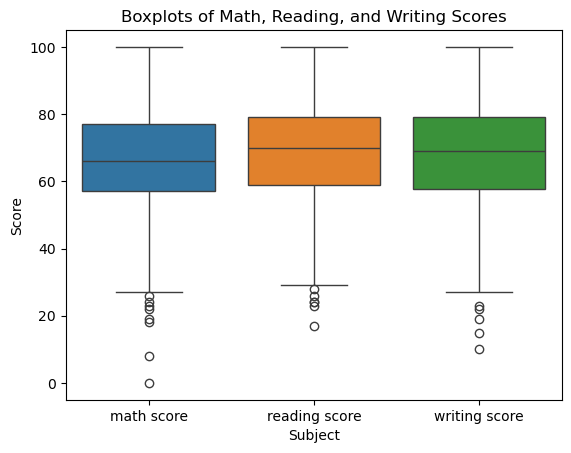

In [92]:
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Boxplots of Math, Reading, and Writing Scores')
plt.ylabel('Score')
plt.xlabel('Subject')
plt.show()

3. Group-wise Comparisons (Categorical vs Numerical)

Do males vs females differ in average math, reading, or writing scores? male are better in math and female are better in reading and writing

Which race/ethnicity group performs best on average? group E 

Does parental education level correlate with higher test scores? Yes children of parents holding a master or bachelor degree performed better then children whose parental education is lower

Does lunch type (standard vs free/reduced) affect performance? students with free/reduced lunch type have performed poorly compared to student with standard lunch type

Does completing the test preparation course improve scores? yes student who have completed test preparation course have done better then student who have not

In [95]:
df.groupby(df['gender']).describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

In [96]:
df.groupby(df['race/ethnicity']).describe()

math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      reading score             ...                \
                  max         count       mean  ...    75%    max   
race/ethnicity                                  ...                 
group A         100.0          89.0  64.674157  ...  74.00  100.0   
group B          97.0         190.0  67.352632  ...  79.75   97.0   
group C          98.0         319.0  69.103448  ...  78.50  100.0   
group D         100.0         262.0  70.030534  ...  79.00  100.0   
group E         100.0         140.0  73.028571  ...  84.00  100.0   

               writing score                                                  \
                       count       mean        std   min    25%   50%    75%   
race/ethnicity                                                                 
group A                 89.0  62.674157  15.468278  19.0  51.00  62.0  73.00   
group B                190.0  65.600000  15.625173  15.0  55.25  67.0  78.00   
group C                319.0  67.827586  14.983378  10.0  57.00  68.0  79.00   
group D                262.0  70.145038  14.367707  32.0  61.00  72.0  80.00   
group E                140.0  71.407143  15.113906  22.0  62.00  72.0  80.25   

                       
                  max  
race/ethnicity         
group A          97.0  
group B          96.0  
group C         100.0  
group D         100.0  
group E         100.0  

[5 rows x 24 columns]

In [100]:
df.groupby(df['parental level of education']).describe()

math score                                     \
                                 count       mean        std   min    25%   
parental level of education                                                 
associate's degree               222.0  67.882883  15.112093  26.0  57.00   
bachelor's degree                118.0  69.389831  14.943789  29.0  61.00   
high school                      196.0  62.137755  14.539651   8.0  53.75   
master's degree                   59.0  69.745763  15.153915  40.0  55.50   
some college                     226.0  67.128319  14.312897  19.0  59.00   
some high school                 179.0  63.497207  15.927989   0.0  53.00   

                                               reading score             ...  \
                              50%   75%    max         count       mean  ...   
parental level of education                                              ...   
associate's degree           67.0  80.0  100.0         222.0  70.927928  ...   
bachelor's degree            68.0  79.0  100.0         118.0  73.000000  ...   
high school                  63.0  72.0   99.0         196.0  64.704082  ...   
master's degree              73.0  81.0   95.0          59.0  75.372881  ...   
some college                 67.5  76.0  100.0         226.0  69.460177  ...   
some high school             65.0  74.0   97.0         179.0  66.938547  ...   

                                          writing score                        \
                               75%    max         count       mean        std   
parental level of education                                                     
associate's degree           81.00  100.0         222.0  69.896396  14.311122   
bachelor's degree            82.75  100.0         118.0  73.381356  14.728262   
high school                  74.25   99.0         196.0  62.448980  14.085907   
master's degree              84.50  100.0          59.0  75.677966  13.730711   
some college                 79.75  100.0         226.0  68.840708  15.012331   
some high school             79.00  100.0         179.0  64.888268  15.736197   

                                                            
                              min   25%   50%   75%    max  
parental level of education                                 
associate's degree           35.0  58.0  70.5  80.0  100.0  
bachelor's degree            38.0  62.5  74.0  83.0  100.0  
high school                  15.0  52.0  64.0  73.0  100.0  
master's degree              46.0  67.0  75.0  85.0  100.0  
some college                 19.0  60.0  70.0  79.0   99.0  
some high school             10.0  54.0  66.0  77.0  100.0  

[6 rows x 24 columns]

In [102]:
df.groupby(df['lunch']).describe() 

math score                                                       \
                  count       mean        std   min   25%   50%   75%    max   
lunch                                                                          
free/reduced      355.0  58.921127  15.159956   0.0  49.0  60.0  69.0  100.0   
standard          645.0  70.034109  13.653501  19.0  61.0  69.0  80.0  100.0   

             reading score             ...              writing score  \
                     count       mean  ...   75%    max         count   
lunch                                  ...                              
free/reduced         355.0  64.653521  ...  75.0  100.0         355.0   
standard             645.0  71.654264  ...  82.0  100.0         645.0   

                                                                   
                   mean        std   min   25%   50%   75%    max  
lunch                                                              
free/reduced  63.022535  15.433823  10.0  53.0  64.0  74.0  100.0  
standard      70.823256  14.339487  22.0  62.0  72.0  81.0  100.0  

[2 rows x 24 columns]

In [104]:
df.groupby(df['test preparation course']).describe() 

math score                                          \
                             count       mean        std   min   25%   50%   
test preparation course                                                      
completed                    358.0  69.695531  14.444699  23.0  60.0  69.0   
none                         642.0  64.077882  15.192376   0.0  54.0  64.0   

                                      reading score             ...        \
                           75%    max         count       mean  ...   75%   
test preparation course                                         ...         
completed                79.00  100.0         358.0  73.893855  ...  84.0   
none                     74.75  100.0         642.0  66.534268  ...  76.0   

                               writing score                              \
                           max         count       mean        std   min   
test preparation course                                                    
completed                100.0         358.0  74.418994  13.375335  36.0   
none                     100.0         642.0  64.504673  14.999661  10.0   

                                                  
                          25%   50%   75%    max  
test preparation course                           
completed                66.0  76.0  83.0  100.0  
none                     54.0  65.0  74.0  100.0  

[2 rows x 24 columns]

Are math, reading, and writing scores correlated? 

Do students who perform well in one subject generally perform well in others?

What’s the correlation matrix between all three?

The correlation matrix shows that all three subjects—math, reading, and writing—are strongly positively correlated with each other. Specifically, math and reading have a correlation of 0.818, math and writing 0.803, and reading and writing an exceptionally high 0.955. This means students who perform well in one subject tend to perform well in the others too, especially between reading and writing, which are very closely linked in terms of language and comprehension skills. Overall, the strong correlations suggest that academic ability across these subjects is highly consistent, and success in one area generally predicts strong performance in the others.

In [110]:
df[['math score', 'reading score',
       'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


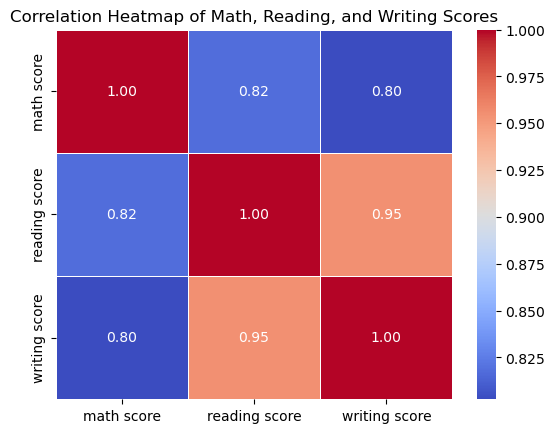

In [111]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Math, Reading, and Writing Scores')
plt.show()

5. Combined Insights (Multi-variable)

Among students who completed test prep, which gender benefits the most? 

Among students who completed the test preparation course, females benefit slightly more overall, achieving higher average scores than males—particularly in reading and writing. However, when comparing these results to their general performance patterns, it appears that the test preparation course does not significantly alter gender-based trends. In other words, females continue to outperform males in language-related subjects and males remain slightly stronger in math, consistent with their performance even without the course. This suggests that while test preparation helps both genders, it does not have a disproportionately greater impact on one gender over the other—each gender’s relative strengths remain similar before and after completing test preparation.

Is the effect of lunch type on math score different across race/ethnicity?

Across all race/ethnicity groups, students who received standard lunch consistently outperformed those who received free/reduced lunch in math scores. This pattern holds true for every group — from Group A through Group E — with average differences of roughly 10 to 12 points. The trend suggests that lunch type has a uniform impact across ethnic groups, where students with standard lunches tend to achieve higher math performance. This likely reflects broader socioeconomic differences, as students eligible for free or reduced lunch often face limited access to resources that can support academic achievement. In summary, while average math performance varies slightly by ethnicity, the effect of lunch type is consistent and clear: standard lunch students perform better in math across all groups.

Does parental education level influence how much test prep helps?

The data shows a clear positive relationship between parental education level and student performance, with students whose parents hold bachelor’s or master’s degrees achieving the highest average scores across math, reading, and writing. Additionally, completing the test preparation course improves scores across all education levels, but the magnitude of improvement is slightly greater for students whose parents have lower education levels (such as high school or some high school). For example, students with parents who only completed high school show about a 4–5 point increase after test prep, compared to smaller gains among those with more educated parents. This suggests that while test preparation benefits all students, it provides a stronger relative advantage for those from less academically privileged backgrounds, helping to narrow performance gaps associated with parental education.


In [113]:
completed_test_prep = df[df['test preparation course']== 'completed']

In [116]:
completed_test_prep.groupby('gender').describe()

math score                                                        \
            count       mean        std   min    25%   50%   75%    max   
gender                                                                    
female      184.0  67.195652  14.244346  23.0  58.75  67.0  76.0   99.0   
male        174.0  72.339080  14.221817  39.0  62.00  73.0  82.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         184.0  77.375000  ...  86.0  100.0         184.0  78.793478   
male           174.0  70.212644  ...  81.0  100.0         174.0  69.793103   

                                                    
              std   min    25%   50%    75%    max  
gender                                              
female  12.240788  36.0  72.00  79.0  87.25  100.0  
male    12.992339  38.0  60.25  70.0  79.00  100.0  

[2 rows x 24 columns]

In [118]:
df.groupby(['race/ethnicity', 'lunch'])['math score'].mean()

race/ethnicity  lunch       
group A         free/reduced    55.222222
                standard        65.981132
group B         free/reduced    57.434783
                standard        66.884298
group C         free/reduced    56.412281
                standard        68.941463
group D         free/reduced    61.115789
                standard        70.916168
group E         free/reduced    66.560976
                standard        76.828283
Name: math score, dtype: float64

In [122]:
df.groupby(['parental level of education', 'test preparation course'])[['math score','reading score','writing score']].mean()

math score  \
parental level of education test preparation course               
associate's degree          completed                 71.829268   
                            none                      65.571429   
bachelor's degree           completed                 73.282609   
                            none                      66.902778   
high school                 completed                 65.000000   
                            none                      60.992857   
master's degree             completed                 70.600000   
                            none                      69.307692   
some college                completed                 71.454545   
                            none                      64.892617   
some high school            completed                 66.701299   
                            none                      61.078431   

                                                     reading score  \
parental level of education test preparation course                  
associate's degree          completed                    76.170732   
                            none                         67.857143   
bachelor's degree           completed                    76.739130   
                            none                         70.611111   
high school                 completed                    67.839286   
                            none                         63.450000   
master's degree             completed                    78.250000   
                            none                         73.897436   
some college                completed                    75.987013   
                            none                         66.087248   
some high school            completed                    70.948052   
                            none                         63.911765   

                                                     writing score  
parental level of education test preparation course                 
associate's degree          completed                    76.817073  
                            none                         65.842857  
bachelor's degree           completed                    78.695652  
                            none                         69.986111  
high school                 completed                    68.053571  
                            none                         60.207143  
master's degree             completed                    80.100000  
                            none                         73.410256  
some college                completed                    76.519481  
                            none                         64.872483  
some high school            completed                    70.363636  
                            none                         60.754902